<a href="https://colab.research.google.com/github/lovelyoyrmia/machine-learning-notebook/blob/main/face_masked_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face Masked Detection**

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Import all of the packages

In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout
from keras.optimizers import adam_v2

## Unzip Dataset

In [7]:
! unzip masked.zip 

Archive:  masked.zip
  inflating: Image Scraper/Mask On/2.jpeg  
  inflating: Image Scraper/Mask On/Screen Shot 2021-12-10 at 6.38.46 PM.png  
  inflating: Image Scraper/Mask On/IMG-20200318-WA0002.jpeg  
  inflating: Image Scraper/Mask On/Screen Shot 2021-12-10 at 6.35.20 PM.png  
  inflating: Image Scraper/Mask On/3.jpg  
  inflating: Image Scraper/Mask On/1.jpg  
  inflating: Image Scraper/Mask On/people with masks on14.jpeg  
  inflating: Image Scraper/Mask On/IMG-20210214-WA0000.jpeg  
  inflating: Image Scraper/Mask On/100062100773_132845.jpeg  
  inflating: Image Scraper/Mask On/IMG-20200317-WA0000.jpeg  
  inflating: Image Scraper/Mask On/people with masks on2.jpeg  
  inflating: Image Scraper/Mask On/IMG-20210306-WA0015.jpeg  
  inflating: Image Scraper/Mask On/Screen Shot 2021-12-10 at 6.37.04 PM.png  
  inflating: Image Scraper/Mask On/PXL_20210214_170134333.PORTRAIT.jpg  
  inflating: Image Scraper/Mask On/5d0d1386-707b-42f7-94f1-37a77bd2e7ae-etsy-face-mask.jpg  
  inflatin

## Declare Variable

In [8]:
path = 'Image_Scraper'
images = []
classNo = []
testRatio = 0.2
valRatio = 0.2
imgDimension = (32, 32, 3)

## Load Classes Path

In [18]:
myList = os.listdir(path)
myList.remove('.ipynb_checkpoints')
numOfClasses = len(myList)
numOfClasses

2

In [23]:
for x in range(0, numOfClasses):
  myPicList = os.listdir(path + '/' + str(x))
  for y in myPicList:
    curImg = cv2.imread(path + '/' + str(x) + '/' + y)
    curImg = cv2.resize(curImg, (imgDimension[0], imgDimension[1]))
    images.append(curImg)
    classNo.append(x)
  print(x)

0
1


In [30]:
images = np.array(images)
classNo = np.array(classNo)
print(images.shape)
classNo.shape

(144, 32, 32, 3)


(144,)

## Spliting the data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=valRatio)

In [32]:
X_train.shape

(92, 32, 32, 3)

In [33]:
numOfSample = []

for x in range(0, numOfClasses):
  numOfSample.append(len(np.where(y_train==x)[0]))

In [34]:
numOfSample

[41, 51]

## Visualize data

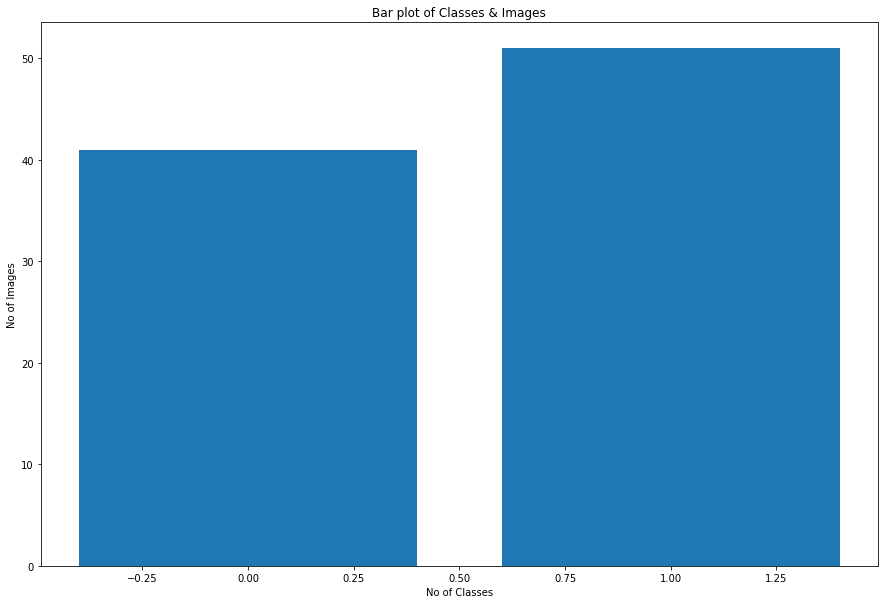

In [35]:
plt.figure(figsize=(15, 10))
plt.bar(range(0, numOfClasses), numOfSample)
plt.title('Bar plot of Classes & Images')
plt.xlabel('No of Classes')
plt.ylabel('No of Images')
plt.show()

## Processing Data

In [36]:
def preprocessing(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.equalizeHist(img)
  img = img / 255
  return img

In [37]:
X_train = np.array(list(map(preprocessing, X_train)))
X_test = np.array(list(map(preprocessing, X_test)))
X_val = np.array(list(map(preprocessing, X_val)))

In [39]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)

In [40]:
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

In [41]:
dataGen.fit(X_train)

In [42]:
y_train = to_categorical(y_train, numOfClasses)
y_test = to_categorical(y_test, numOfClasses)
y_val = to_categorical(y_val, numOfClasses)

## Create Model

In [43]:
from keras.optimizer_v2.adam import Adam
from keras.layers.core.flatten import Flatten
def myModel():
  sizeOfFilter1 = (3, 3)
  sizeOfFilter2 = (3, 3)
  sizeOfPool = (2, 2)

  model = Sequential()
  model.add((Conv2D(32, sizeOfFilter1, input_shape=(imgDimension[0], imgDimension[1], 1), activation='relu')))
  model.add((Conv2D(32, sizeOfFilter1, activation='relu')))
  model.add(MaxPooling2D(pool_size=sizeOfPool))

  model.add((Conv2D(64, sizeOfFilter2, activation='relu')))
  model.add((Conv2D(64, sizeOfFilter2, activation='relu')))
  model.add(MaxPooling2D(pool_size=sizeOfPool))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(numOfClasses, activation='softmax'))
  model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [44]:
model = myModel()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [45]:
history = model.fit_generator(dataGen.flow(X_train, y_train, batch_size=50), 
                              steps_per_epoch=1000, epochs=2, validation_data=(X_val, y_val), shuffle=1)

Epoch 1/2
1000/1000 [==============================] - 2s 417us/step - loss: 0.6948 - accuracy: 0.4565 - val_loss: 0.7031 - val_accuracy: 0.3913
